## Sampling from discrete distributions

First, let us generate a random discrete distributions of $10$ elements, with each weights each generated from a random uniform distribution (and normalizing). We also compute the maximum and the cumulative distribution.

In [24]:
import random                     #Library of random numbers
import numpy                      #For arrays 
import math                       #For maths 
import time                       #For timing 
import operator                   #Will use to compute maxs
import pylab                      #Ploting Library 

n_iter=10

#generate a random distribution
Prob=[]
Norm=0
for i in range(n_iter):
    Prob.append(random.uniform(0,1))
    Norm=Norm+Prob[i]

#Normalization 
for i in range(n_iter):
    Prob[i]=Prob[i]/Norm      

index, value_max = max(enumerate(Prob), key=operator.itemgetter(1)) #Computing the maximum value
cum = [0.0] #computing cumulative, PROB < i 
for l in xrange(n_iter):
    cum.append(cum[l] + Prob[l])    
    
print "i   Prob(i)           Prob<i"
for i in range(n_iter):
    print i, ' ',Prob[i], ' ', cum[i]

i   Prob(i)           Prob<i
0   0.188861009082   0.0
1   0.161821580089   0.188861009082
2   0.000191806427663   0.350682589171
3   0.183939888069   0.350874395599
4   0.0102483688707   0.534814283668
5   0.0320247580563   0.545062652538
6   0.135013290347   0.577087410595
7   0.0275243020514   0.712100700942
8   0.147744941402   0.739625002993
9   0.112630055605   0.887369944395


Note that our cumalative is defined here the the probabilty to be stricly small than $i$. Now, let us implement the Accept/Reject strategy we have seen, and check that we are sampling with the correct probability.

A/R sampling took  0.0755748748779


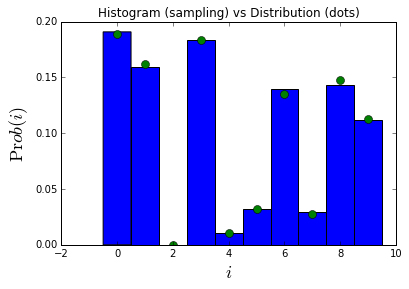

In [32]:
def sample_AR(prob,value_max,N):
    ok=0
    ir=0
    trial=0
    while ok==0 :
        trial=trial+1
        x = random.uniform(0,N)
        y = random.uniform(0,value_max)
        ir = int(math.floor(x))
        if prob[ir]>y :
            ok=1   
    
    return ir

start = time.time()        
list_int =[]
for i in range(10000):
    list_int.append(sample_AR(Prob,value_max,n_iter))
end = time.time()        
print 'A/R sampling took ', end - start

# Ploting the histogram of the data
x = [a for a in range(n_iter)]
y = [Prob[a] for a in range(n_iter)]
pylab.figure()
pylab.hist(list_int, bins=n_iter, range=(-0.5, n_iter-0.5), normed=True)
pylab.plot(x, y,'o', ms=8)
pylab.title("Histogram (sampling) vs Distribution (dots)")
pylab.xlabel('$i$',fontsize=18)
pylab.ylabel('$\Prob(i)$',fontsize=18)
pylab.show()

The histogram of the sampled data corresponds very well with the distribution, as it should. Let us repeat this feat with the Tower Sampling strategy.

Tower sampling took  0.0554840564728


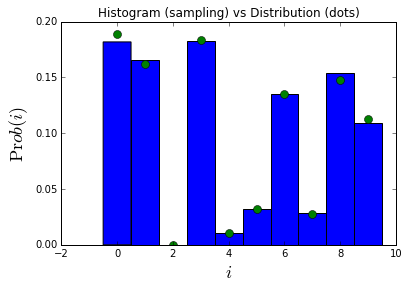

In [33]:
# bisection search to find the bin corresponding to eta
def bisection_search(eta, w_cumulative):
    kmin = 0
    kmax = len(w_cumulative)
    while True:
        k = int((kmin + kmax) / 2)
        if w_cumulative[k] < eta:
            kmin = k
        elif w_cumulative[k - 1] > eta:
            kmax = k
        else:
            return k - 1

# sample an integer number according to weights
def sample_T(w_cumulative):
    eta = random.random() 
    sampled_choice = bisection_search(eta, w_cumulative)
    return sampled_choice

start = time.time()        
list_int2 =[]
for i in range(10000):
    list_int2.append(sample_T(cum))
end = time.time()        
print 'Tower sampling took ', end - start

# Ploting the histogram of the data
x = [a for a in range(n_iter)]
y = [Prob[a] for a in range(n_iter)]
pylab.figure()
pylab.hist(list_int2, bins=n_iter, range=(-0.5, n_iter-0.5), normed=True)
pylab.plot(x, y,'o', ms=8)
pylab.title("Histogram (sampling) vs Distribution (dots)")
pylab.xlabel('$i$',fontsize=18)
pylab.ylabel('$\Prob(i)$',fontsize=18)
pylab.show() 


Again, our sampling works just fine, with comparable running time.